# Interpolación

**Nota:** Los siguientes ejercicios están basados en las notas de clase disponibles en: https://github.com/ITAM-DS/Propedeutico/blob/master/Python/clases/3_algebra_lineal/2_interpolacion.ipynb

## Ejercicio 1:
Interpolar con 10 puntos generados de la función de Runge $f(x) = \frac{1}{1+25x^2}$ en el intervalo $[-1,1]$ equidistantes. Hacer la gráfica con $10,000$ puntos en el mismo intervalo. Utilizar polyfit para el polinomio interpolador y splines cúbicos.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import pprint
import numpy as np
np.set_printoptions(precision = 2)

In [2]:
# Generar 10 puntos
runge_f = lambda x: 1/(1+25*(x**2)) # Función de Runge
n_points = 10
x = np.linspace(-1,1,n_points)
y = runge_f(x)

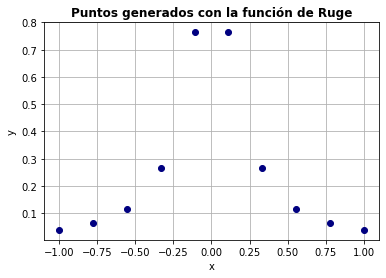

In [12]:
plt.plot(x,y, 'o', color='navy')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos generados con la función de Ruge', fontweight="bold")
plt.grid(False)

plt.grid(True)
plt.show()

In [6]:
# Polinomio de n-1 grados: 
print(f"* Interpolador con polinomio de {n_points-1} grados")
n_grados = n_points-1
coeficientes_nuevos = np.polyfit(x, y, n_grados)
pprint.pprint(coeficientes_nuevos)

* Interpolador con polinomio de 9 grados
array([ 1.51e-13,  2.16e+01, -2.90e-13, -4.49e+01,  1.66e-13,  3.07e+01,
       -2.58e-14, -8.26e+00,  0.00e+00,  8.62e-01])


In [7]:
# Coeficientes asoaciados al polinomio:
x_polin = np.arange(n_grados-1, 0-1, -1)# backwards range: en el interpolador los coef. asociados salen al revés.
print('-'*20); print('Interpolador de polinomio con n-1 grados'); print('-'*20);
for a,b in zip(x_polin, coeficientes_nuevos):
    print(f"El coeficiente asociado a x**{a} es {'{0:.4f}'.format(b)}")             
print('-'*20)

--------------------
Interpolador de polinomio con n-1 grados
--------------------
El coeficiente asociado a x**8 es 0.0000
El coeficiente asociado a x**7 es 21.6248
El coeficiente asociado a x**6 es -0.0000
El coeficiente asociado a x**5 es -44.9155
El coeficiente asociado a x**4 es 0.0000
El coeficiente asociado a x**3 es 30.7285
El coeficiente asociado a x**2 es -0.0000
El coeficiente asociado a x**1 es -8.2609
El coeficiente asociado a x**0 es 0.0000
--------------------


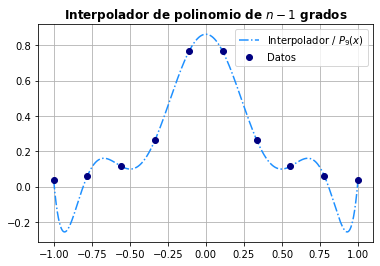

In [11]:
# Gráfica de Polinomio de n-1 grados
neval = 10000
xeval = np.linspace(min(x),max(x), neval)
yeval = np.polyval(coeficientes_nuevos,xeval)
#print('xeval.shape:', xeval.shape[0])
#print('yeval.shape:', yeval.shape[0])

plt.plot(xeval, yeval, '-.', color='dodgerblue')
plt.plot(x, y, 'o', color='navy')
plt.legend(('Interpolador / $P_{9}(x)$','Datos'), loc='best')
plt.title('Interpolador de polinomio de $n-1$ grados', fontweight="bold")

plt.grid(True)
plt.show()

In [15]:
# Polinomios a trozos (Piecewise)
from scipy.interpolate import interp1d
pw_l = interp1d(x, y) #linear piecewise

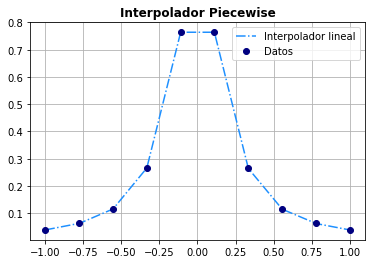

In [18]:
# Gráfica de Polinomio de n-1 grados

neval = 10000
xeval = np.linspace(min(x),max(x), neval)
yeval = pw_l(xeval)
#print('xeval.shape:', xeval.shape[0])
#print('yeval.shape:', yeval.shape[0])

plt.plot(xeval, yeval, '-.', color='dodgerblue')
plt.plot(x, y, 'o', color='navy')
plt.legend(('Interpolador lineal', 'Datos'), loc='best')
plt.title('Interpolador Piecewise', fontweight="bold")

plt.grid(True)
plt.show()

In [20]:
# Slipe cúbico
pw_spline = interp1d(x, y, kind = 'cubic')

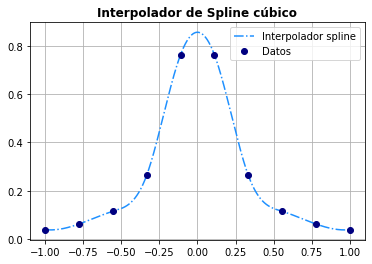

In [22]:
neval = 10000
xeval = np.linspace(min(x),max(x), neval)
yeval = pw_spline(xeval)
#print('xeval.shape:', xeval.shape[0])
#print('yeval.shape:', yeval.shape[0])

plt.plot(xeval, yeval, '-.', color='dodgerblue')
plt.plot(x, y, 'o', color='navy')
plt.legend(('Interpolador spline', 'Datos'), loc='best')
plt.title('Interpolador de Spline cúbico', fontweight="bold")

plt.grid(True)
plt.show()